<a href="https://colab.research.google.com/github/Rajeev9-Pondala/Algorithms/blob/main/Comprehensive_Data_Analysis_%26_Statistical_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [ ]:

# Load the dataset
penguins_df = pd.read_csv('penguins.csv')

# Display the first few rows of the dataset
print(penguins_df.head())

# Summarize the dataset structure
print("\nDataset Summary:")
print(f"Number of Rows: {penguins_df.shape[0]}")
print(f"Number of Columns: {penguins_df.shape[1]}")
print("Data Types:")
print(penguins_df.dtypes)

   rowid species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0      1  Adelie  Torgersen            39.1           18.7              181.0   
1      2  Adelie  Torgersen            39.5           17.4              186.0   
2      3  Adelie  Torgersen            40.3           18.0              195.0   
3      4  Adelie  Torgersen             NaN            NaN                NaN   
4      5  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  

Dataset Summary:
Number of Rows: 344
Number of Columns: 9
Data Types:
rowid                  int64
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   i

In [ ]:
# Check for missing values
missing_values = penguins_df.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Handling missing values: Dropping rows with any missing values
penguins_cleaned = penguins_df.dropna()

# Setting up the aesthetic style of the plots
sns.set(style="whitegrid")


Missing Values:
rowid                 0
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


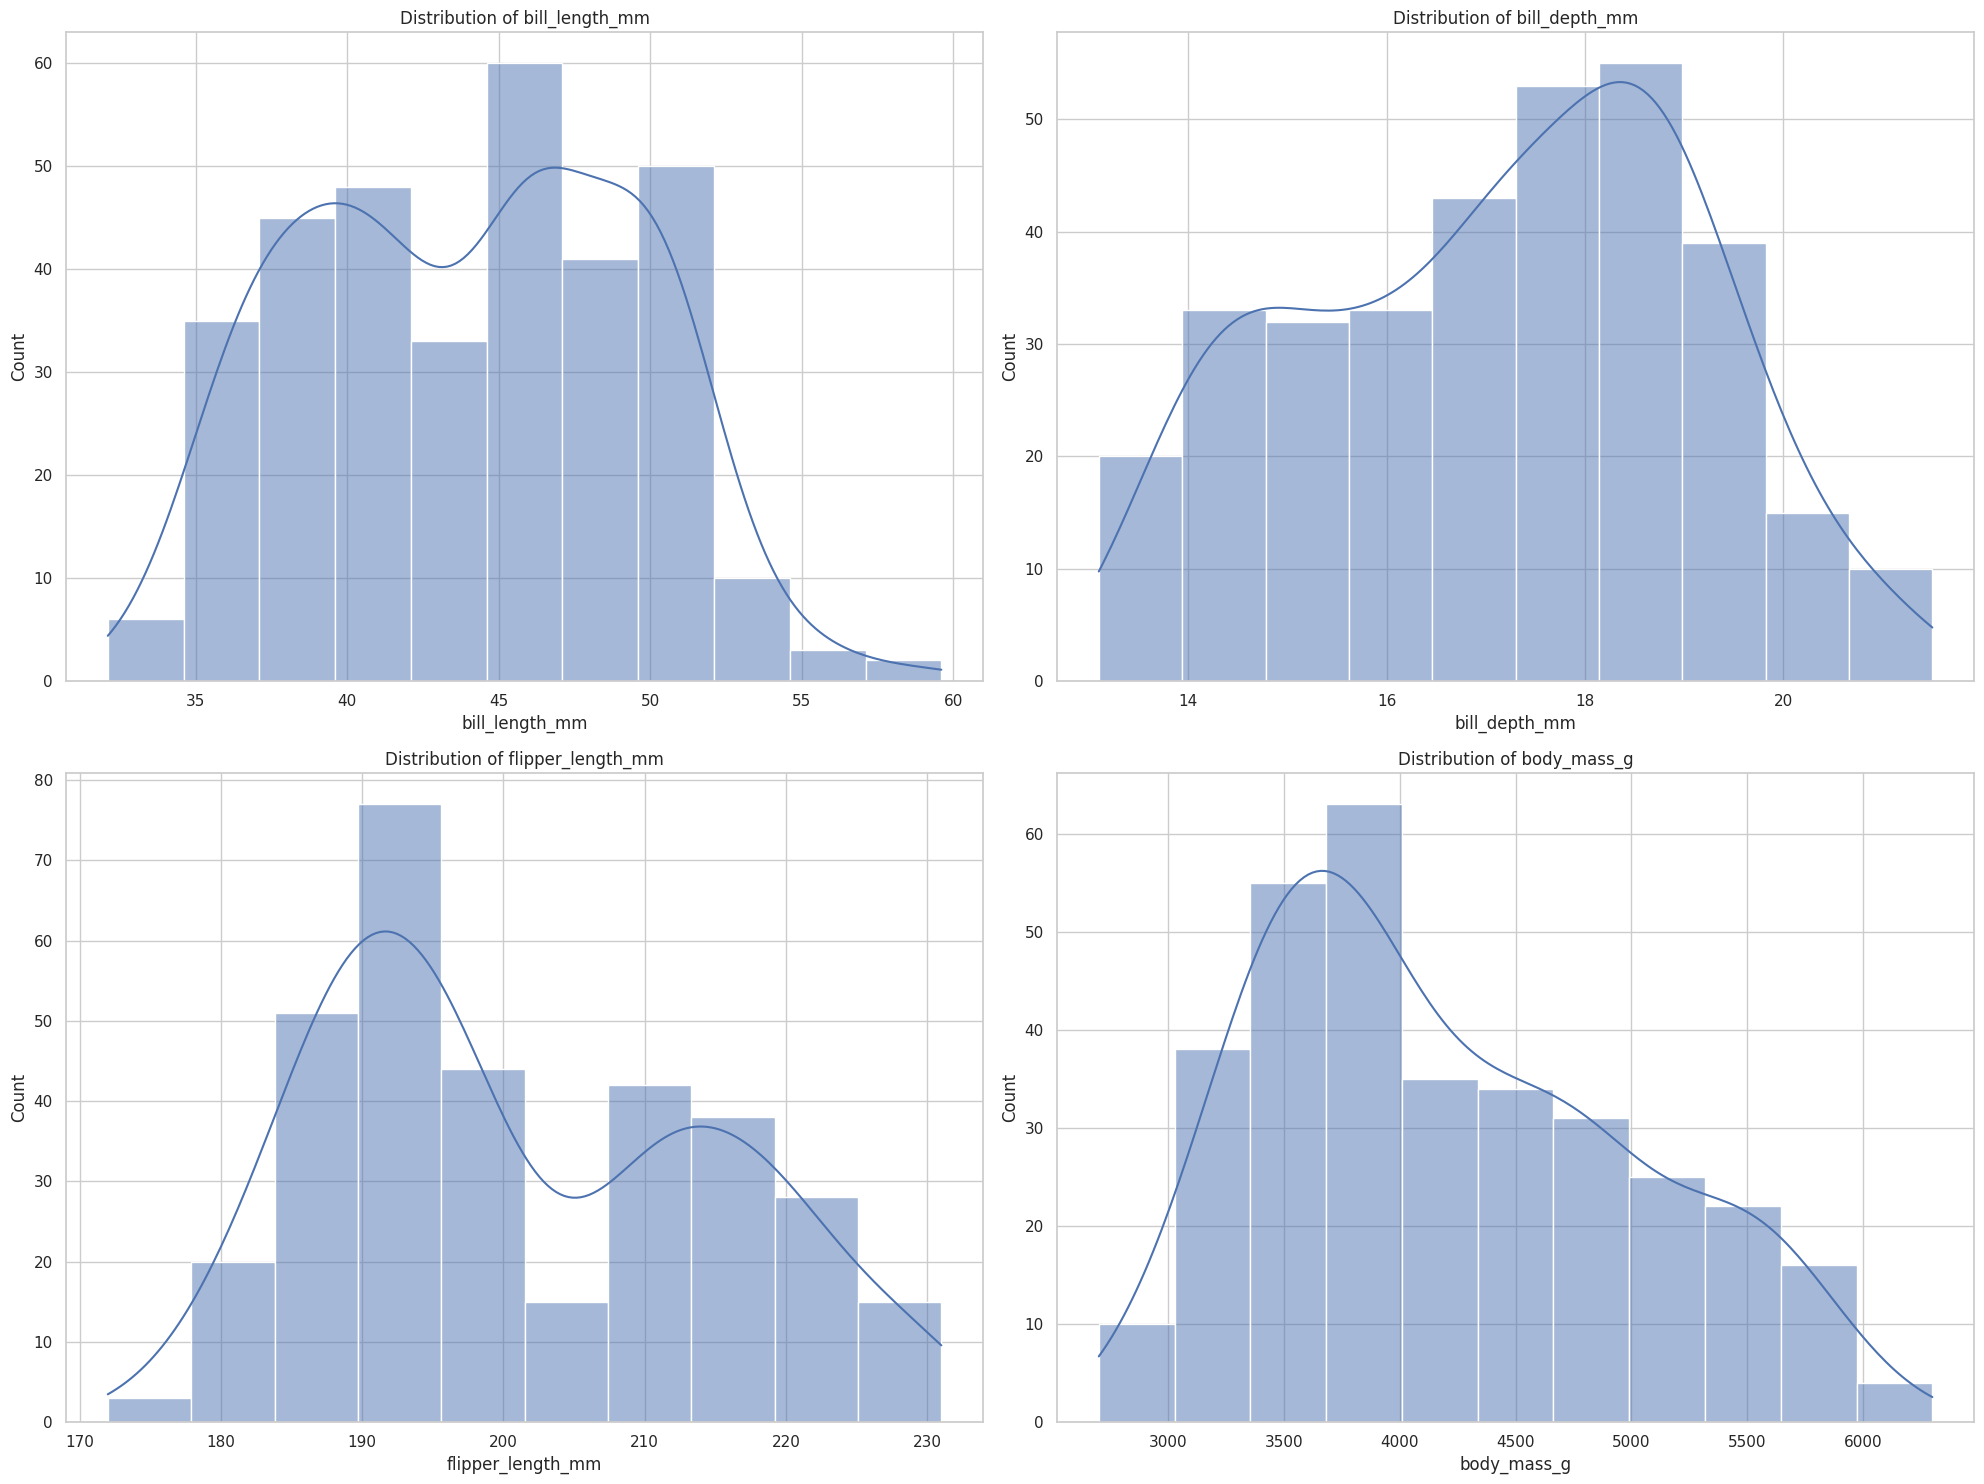

In [ ]:

# Histograms for numerical attributes
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(penguins_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


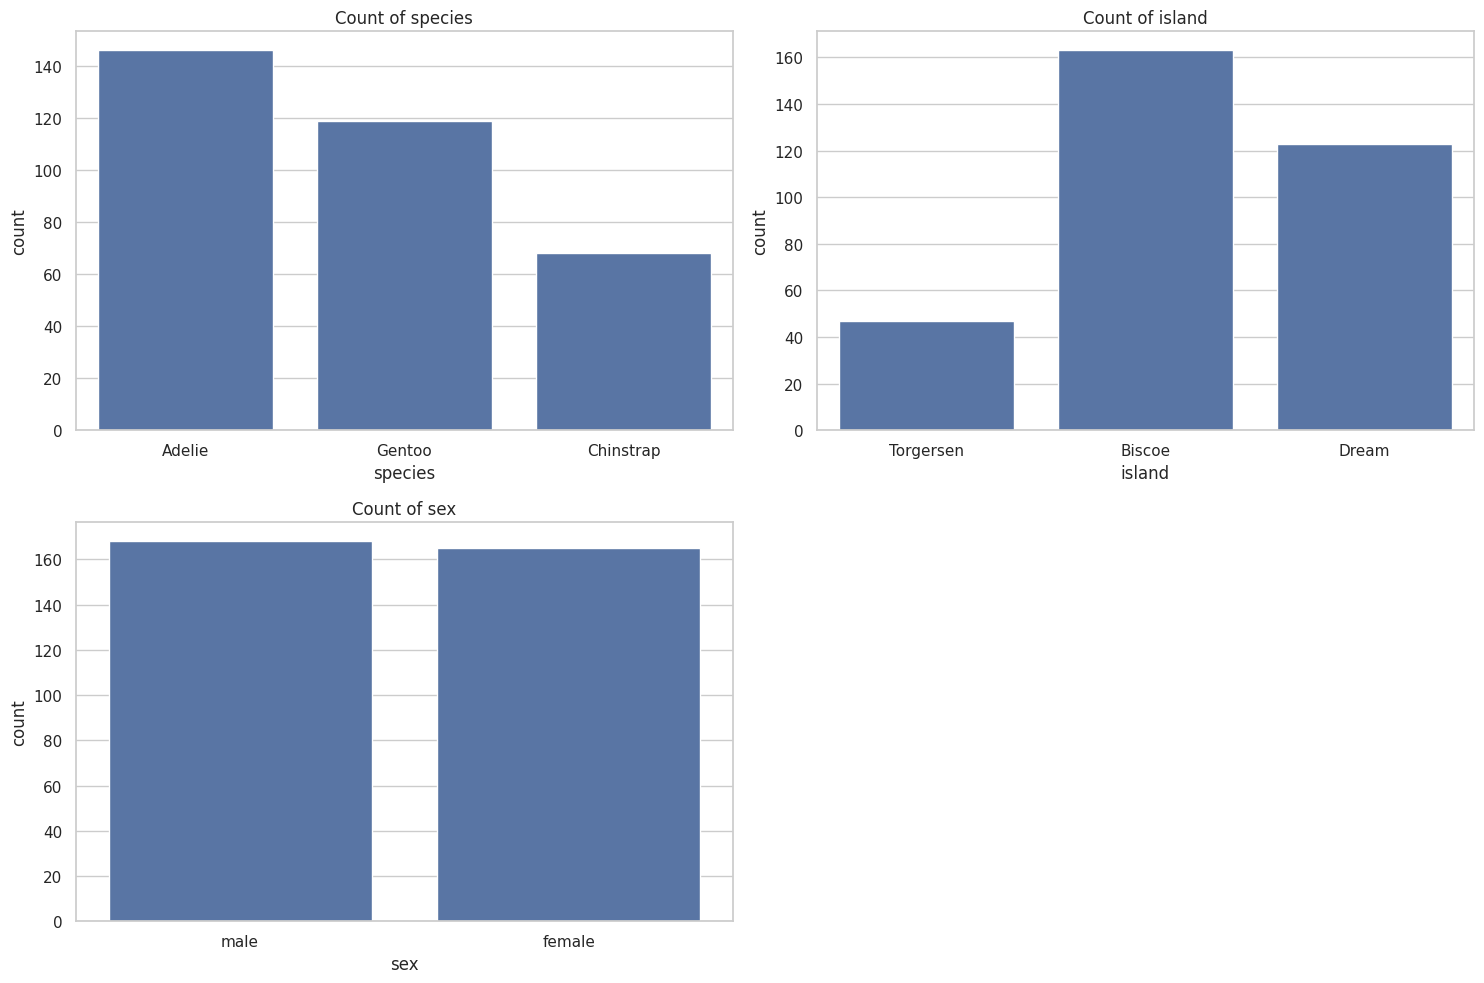

In [ ]:

# Bar charts for categorical attributes
categorical_columns = ['species', 'island', 'sex']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, data=penguins_cleaned)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

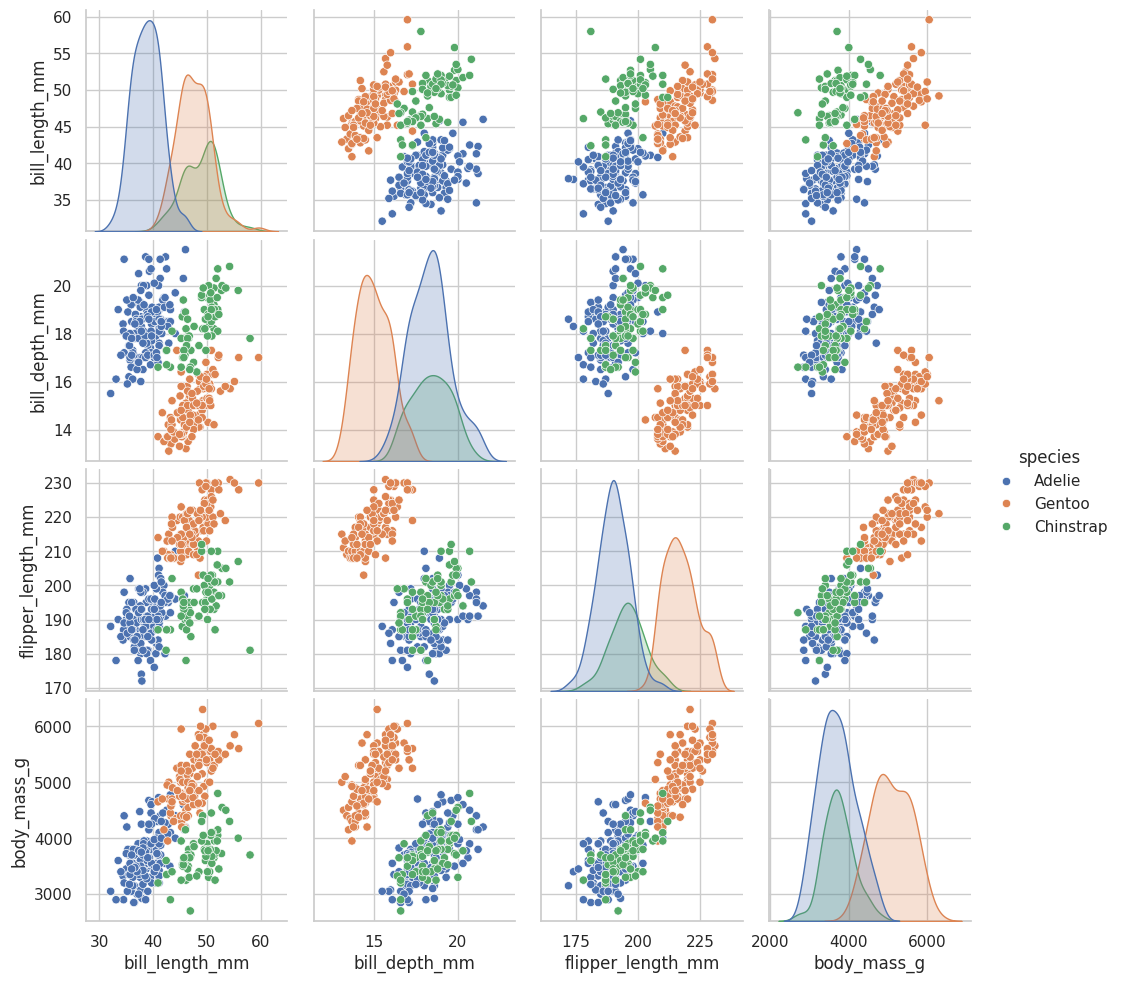

In [ ]:
# Pair plot for numerical attributes colored by species
sns.pairplot(penguins_cleaned, vars=numerical_columns, hue='species')
plt.show()

In [ ]:
# Compute the Multivariate Mean Vector for numerical attributes
multivariate_mean_vector = penguins_cleaned[numerical_columns].mean()
print("Multivariate Mean Vector:\n", multivariate_mean_vector)

Multivariate Mean Vector:
 bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
dtype: float64


In [ ]:

# Center the data by subtracting the mean
centered_data = penguins_cleaned[numerical_columns] - penguins_cleaned[numerical_columns].mean()
# Compute the Sample Covariance Matrix using Inner Product
cov_matrix_inner = np.dot(centered_data.T, centered_data) / (centered_data.shape[0] - 1)

# Compute the Sample Covariance Matrix using Outer Product
outer_products = np.array([np.outer(centered_data.iloc[i], centered_data.iloc[i]) for i in range(centered_data.shape[0])])
cov_matrix_outer = np.mean(outer_products, axis=0)

print("\nSample Covariance Matrix (Inner Product):\n", pd.DataFrame(cov_matrix_inner, index=numerical_columns, columns=numerical_columns))
print("\nSample Covariance Matrix (Outer Product):\n", pd.DataFrame(cov_matrix_outer, index=numerical_columns, columns=numerical_columns))




Sample Covariance Matrix (Inner Product):
                    bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm          29.906333      -2.462091          50.058195   
bill_depth_mm           -2.462091       3.877888         -15.947248   
flipper_length_mm       50.058195     -15.947248         196.441677   
body_mass_g           2595.623304    -748.456122        9852.191649   

                     body_mass_g  
bill_length_mm       2595.623304  
bill_depth_mm        -748.456122  
flipper_length_mm    9852.191649  
body_mass_g        648372.487699  

Sample Covariance Matrix (Outer Product):
                    bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm          29.816525      -2.454698          49.907870   
bill_depth_mm           -2.454698       3.866243         -15.899359   
flipper_length_mm       49.907870     -15.899359         195.851762   
body_mass_g           2587.828639    -746.208506        9822.605488   

                     body

In [ ]:
# Compute the correlation between bill_length_mm and bill_depth_mm using cosine similarity
bill_length_centered = centered_data['bill_length_mm']
bill_depth_centered = centered_data['bill_depth_mm']
cosine_similarity = np.dot(bill_length_centered, bill_depth_centered) / (np.linalg.norm(bill_length_centered) * np.linalg.norm(bill_depth_centered))
print("\nCosine Similarity (Correlation) between bill_length_mm and bill_depth_mm:", cosine_similarity)



Cosine Similarity (Correlation) between bill_length_mm and bill_depth_mm: -0.228625635913029


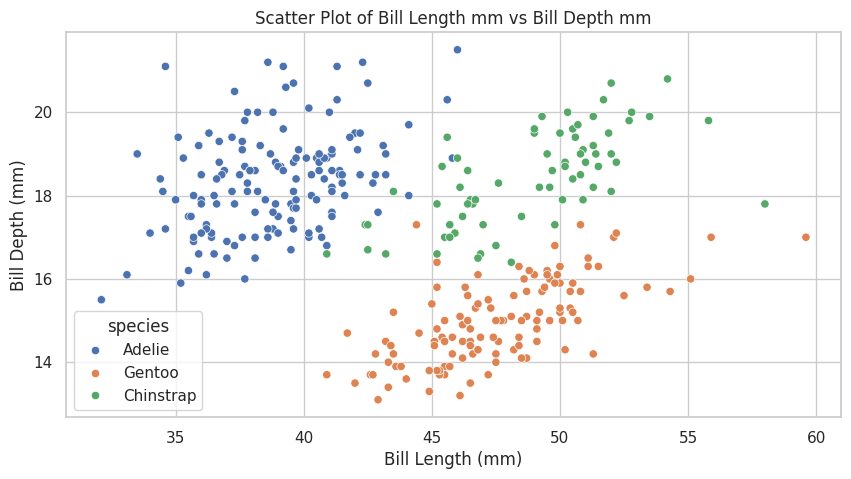

In [ ]:
# Scatter plot of bill_length_mm vs bill_depth_mm
plt.figure(figsize=(10, 5))
sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', data=penguins_cleaned, hue='species')
plt.title('Scatter Plot of Bill Length mm vs Bill Depth mm')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

In [ ]:


# Define cat_columns as a list containing the names of categorical columns
cat_columns = ['species', 'island', 'sex']

# Assuming penguins_cleaned is your DataFrame containing the cleaned data
# Compute the covariance matrix of categorical attributes
cov_matrix_categorical = penguins_cleaned[cat_columns].apply(lambda x: x.factorize()[0]).cov()

print("\033[1m \nCovariance matrix of categorical attributes: \033[0m")
print(cov_matrix_categorical)


 
Covariance matrix of categorical attributes: 
          species    island       sex
species  0.589547  0.234343 -0.001058
island   0.234343  0.459803 -0.001981
sex     -0.001058 -0.001981  0.250733


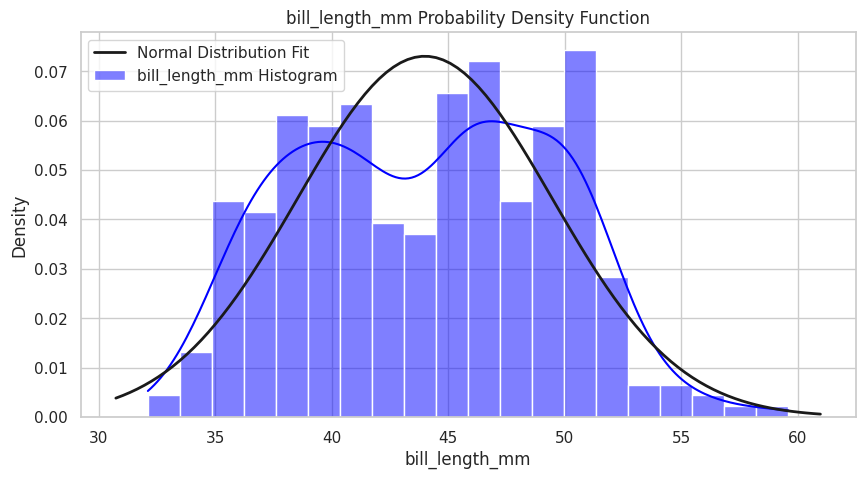

In [ ]:
# Probability Density Function for the first numerical attribute (bill_length_mm)
first_numerical_attribute = numerical_columns[0]
data = penguins_cleaned[first_numerical_attribute]
mu, std = norm.fit(data)
plt.figure(figsize=(10, 5))
sns.histplot(data, kde=True, stat='density', color='blue', bins=20, label=f'{first_numerical_attribute} Histogram')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution Fit')
plt.title(f'{first_numerical_attribute} Probability Density Function')
plt.xlabel(first_numerical_attribute)
plt.ylabel('Density')
plt.legend()
plt.show()

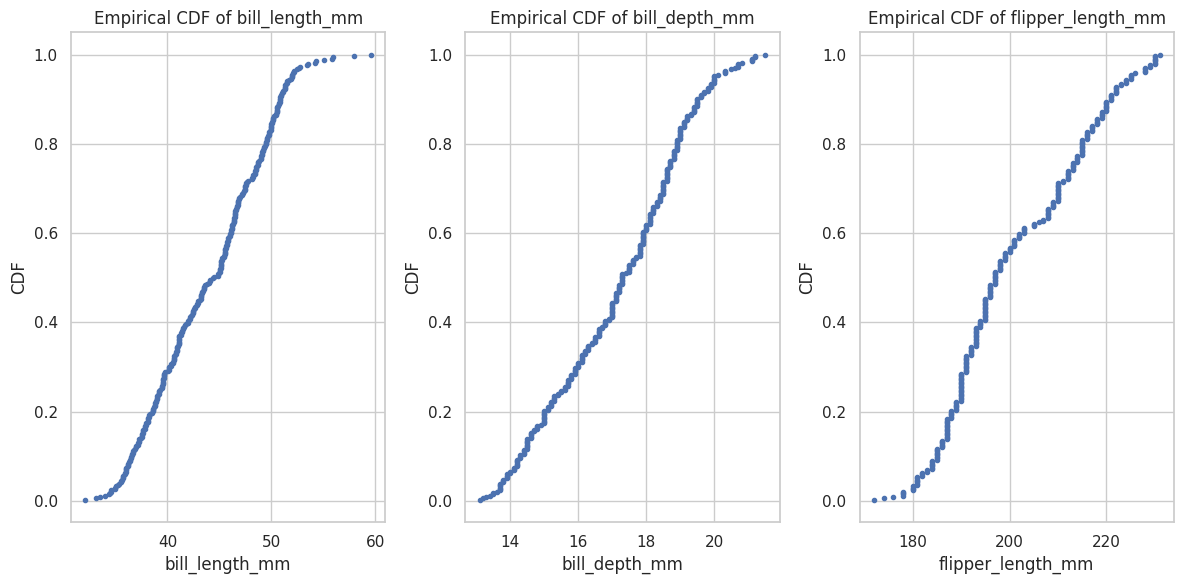

In [ ]:
# Empirical CDFs
plt.figure(figsize=(12, 6))

for i, attribute in enumerate(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']):
    plt.subplot(1, 3, i+1)
    sorted_data = np.sort(penguins_cleaned[attribute])
    ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, ecdf, marker='.', linestyle='none')
    plt.title(f'Empirical CDF of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('CDF')

plt.tight_layout()
plt.show()

In [ ]:
# Calculating variances of numerical attributes
variances = penguins_cleaned[numerical_columns].var()

# Identifying the attribute with the largest variance
# .idxmax() returns the index (in this case, the attribute name) of the first occurrence of the maximum value.
largest_variance_attribute = variances.idxmax()

# Identifying the attribute with the smallest variance
# .idxmin() returns the index (in this case, the attribute name) of the first occurrence of the minimum value.
smallest_variance_attribute = variances.idxmin()

# Printing the attribute with the largest variance and its value
print(f"\nAttribute with Largest Variance: {largest_variance_attribute}, Variance: {variances[largest_variance_attribute]}")

# Printing the attribute with the smallest variance and its value
print(f"Attribute with Smallest Variance: {smallest_variance_attribute}, Variance: {variances[smallest_variance_attribute]}")

# Creating a DataFrame from the inner product sample covariance matrix for easier analysis
# This DataFrame uses the numerical attribute names as both row indices and column headers.
cov_matrix_df = pd.DataFrame(cov_matrix_inner, index=numerical_columns, columns=numerical_columns)

# Extracting the upper triangular part of the covariance matrix
# np.triu returns a mask for the upper triangle, with the main diagonal specified by k=1, meaning one above the main diagonal.
# .astype(bool) converts this mask to boolean values, True for the upper triangle (excluding the diagonal) and False elsewhere.
upper_tri_cov = cov_matrix_df.where(np.triu(np.ones(cov_matrix_df.shape), k=1).astype(bool))

# Finding the largest covariance value in the upper triangular part of the covariance matrix
largest_covariance = upper_tri_cov.stack().max()

# Finding the attribute pair with the largest covariance
# .stack() converts the DataFrame to a Series, collapsing the columns, which allows idxmax() to return the index (attribute pair) of the maximum value.
pair_largest_covariance = upper_tri_cov.stack().idxmax()

# Finding the smallest covariance value in the upper triangular part of the covariance matrix
smallest_covariance = upper_tri_cov.stack().min()



Attribute with Largest Variance: body_mass_g, Variance: 648372.4876985418
Attribute with Smallest Variance: bill_depth_mm, Variance: 3.877888309996744


In [ ]:

# Finding the attribute pair with the smallest covariance
# The use of .stack() and .idxmin() here is analogous to the process used for finding the largest covariance, but for the minimum value instead.
pair_smallest_covariance = upper_tri_cov.stack().idxmin()

# Printing the pairs of attributes with the largest and smallest covariance values
print(f"\nPair with Largest Covariance: {pair_largest_covariance}, Value: {largest_covariance}")
print(f"Pair with Smallest Covariance: {pair_smallest_covariance}, Value: {smallest_covariance}")



Pair with Largest Covariance: ('flipper_length_mm', 'body_mass_g'), Value: 9852.191649480805
Pair with Smallest Covariance: ('bill_depth_mm', 'body_mass_g'), Value: -748.456121784435
